# CNN style 2D convolution¶


In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Function: data generation
def data_generation(n_ch, n_r, n_c, n_filters, f_r, f_c, order):
    """
    Function: data generation
        Input feature maps
            Channel x row x column
            Contents
                order:
                    Random
                    Sequential
        Filter coefficients
            Output x input x row x col
            Contents
                order:
                    Random
                    Sequential
                    
    """
    if order is 'random':
        np.random.seed(1)
        input_feature_map = np.random.randn(n_ch, n_r, n_c)
        filter_mat = np.random.randn(n_filters, n_ch, f_r, f_c)
    elif order is 'sequential':
        input_feature_map = np.arange(0, n_ch * n_r * n_c).reshape(n_ch, n_r, n_c)
        filter_mat =  np.arange(0,n_filters * n_ch * f_r * f_c).reshape(n_filters, n_ch, f_r, f_c)
    else:
        print("Bad input")     
    return input_feature_map, filter_mat

input.shape = (2, 5, 5)
filter.shape = (3, 2, 3, 3)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]

 [[25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]
  [45 46 47 48 49]]]
[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]
   [24 25 26]]

  [[27 28 29]
   [30 31 32]
   [33 34 35]]]


 [[[36 37 38]
   [39 40 41]
   [42 43 44]]

  [[45 46 47]
   [48 49 50]
   [51 52 53]]]]
sample 2D image matrix = [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
sample filter = [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]


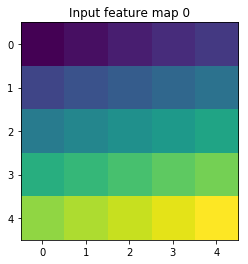

In [50]:
# parameters: n_ch, n_r, n_c, n_filters, f_r, f_c, order = sequential
# input: n_ch, n_r, n_c
# filter: n_filters, n_ch, f_r, f_c
input, filter = data_generation(2, 5, 5, 3, 3, 3, order = 'sequential')
print("input.shape =", input.shape)
print("filter.shape =", filter.shape)
print(input)
print(filter)
print("sample 2D image matrix =", input[0,:,:])
print("sample filter =", filter[0,:,:,:])
fig = input[0,:,:]
plt.imshow(fig)
plt.title('Input feature map 0')

input.shape = (2, 5, 5)
filter.shape = (3, 2, 3, 3)
[[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
  [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
  [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]
  [-1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521]
  [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595]]

 [[-0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547]
  [-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613]
  [-0.0126646  -1.11731035  0.2344157   1.65980218  0.74204416]
  [-0.19183555 -0.88762896 -0.74715829  1.6924546   0.05080775]
  [-0.63699565  0.19091548  2.10025514  0.12015895  0.61720311]]]
[[[[ 0.30017032 -0.35224985 -1.1425182 ]
   [-0.34934272 -0.20889423  0.58662319]
   [ 0.83898341  0.93110208  0.28558733]]

  [[ 0.88514116 -0.75439794  1.25286816]
   [ 0.51292982 -0.29809284  0.48851815]
   [-0.07557171  1.13162939  1.51981682]]]


 [[[ 2.18557541 -1.39649634 -1.44411381]
   [-0.5044

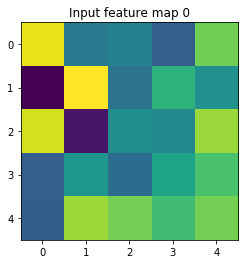

In [51]:
# parameters: n_ch, n_r, n_c, n_filters, f_r, f_c, order = random
# input: n_ch, n_r, n_c
# filter: n_filters, n_ch, f_r, f_c
input_random, filter_random = data_generation(2, 5, 5, 3, 3, 3, order = 'random')
print("input.shape =", input_random.shape)
print("filter.shape =", filter_random.shape)
print(input_random)
print(filter_random)
print("sample 2D image matrix =", input_random[0,:,:])
print("sample filter =", filter_random[0,:,:,:])
fig = input_random[0,:,:]
plt.imshow(fig)
plt.title('Input feature map 0')

In [52]:
def preprocessing(X, preprocess , pad):
    """Function: pre processing 
            Zero padding 
                Top, bottom, left, right
            Up sampling
                Input feature maps Filters 
            """
    if preprocess is 'zero_padding':
        X = np.pad(X, ((0, 0), (pad, pad), (pad, pad)), 'constant', constant_values=0)
        return X 
    elif preprocess is 'up_sampling':
        n_ch, n_r, n_c = X.shape
        Z = np.zeros((n_ch, 2 * n_r,2 * n_c))
        for i in range(0, n_ch): 
            for j in range(0, 2 * n_r, 2):
                for k in range(0, 2 * n_c):
                    if (j+k) % 2 == 0:  
                        Z[i][j][k] = Z[i][j][k] + X[i][int(j/2)][int(k/2)]
        return Z
    else:
        print("Bad input")

input.shape = (2, 5, 5)
input_pad.shape = (2, 9, 9)
[[[ 0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0]
  [ 0  0  0  1  2  3  4  0  0]
  [ 0  0  5  6  7  8  9  0  0]
  [ 0  0 10 11 12 13 14  0  0]
  [ 0  0 15 16 17 18 19  0  0]
  [ 0  0 20 21 22 23 24  0  0]
  [ 0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0]
  [ 0  0 25 26 27 28 29  0  0]
  [ 0  0 30 31 32 33 34  0  0]
  [ 0  0 35 36 37 38 39  0  0]
  [ 0  0 40 41 42 43 44  0  0]
  [ 0  0 45 46 47 48 49  0  0]
  [ 0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0]]]


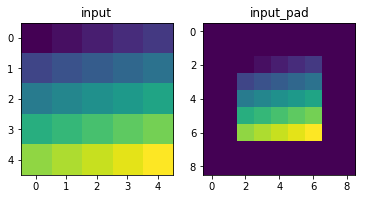

In [53]:
input_pad = preprocessing(input, preprocess = 'zero_padding', pad = 2)
print("input.shape =", input.shape)
print ("input_pad.shape =", input_pad.shape)
print(input_pad)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('input')
axarr[0].imshow(input[0,:,:])
axarr[1].set_title('input_pad')
axarr[1].imshow(input_pad[0,:,:])

input.shape = (2, 5, 5)
input_up_sampling.shape = (2, 9, 9)
[[[  0.   0.   1.   0.   2.   0.   3.   0.   4.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  5.   0.   6.   0.   7.   0.   8.   0.   9.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 10.   0.  11.   0.  12.   0.  13.   0.  14.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 15.   0.  16.   0.  17.   0.  18.   0.  19.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 20.   0.  21.   0.  22.   0.  23.   0.  24.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

 [[ 25.   0.  26.   0.  27.   0.  28.   0.  29.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 30.   0.  31.   0.  32.   0.  33.   0.  34.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 35.   0.  36.   0.  37.   0.  38.   0.  39.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [ 40.   0.  41.   0.  42.   0.  43.   0.  44.   0.]
  [  0.   0.   0.   

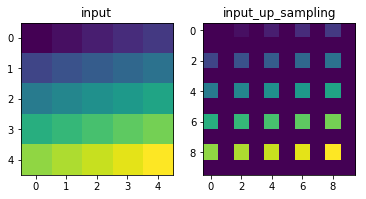

In [54]:
input_up_sampling = preprocessing(input, preprocess = 'up_sampling', pad = 0)
print("input.shape =", input.shape)
print ("input_up_sampling.shape =", input_pad.shape)
print(input_up_sampling)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('input')
axarr[0].imshow(input[0,:,:])
axarr[1].set_title('input_up_sampling')
axarr[1].imshow(input_up_sampling[0,:,:])

In [55]:
def matrix_creation(X, filter_dim, pad , stride):
    """
    Function: matrix creation
                    input feature map matrix
                    padding factor
                    Filter coefficient matrix
                    stride factor
                    Output feature map matrix (empty)
    """
    n_ch, n_r, n_c = X.shape
    n_filters, n_channels, f_r, f_c = filter_dim.shape
    output_size = math.floor(((n_r + 2 * pad - f_r) / stride) + 1)
    output = np.empty((n_filters, output_size, output_size)).reshape((n_filters ,output_size * output_size))
    return output

In [56]:
output_matrix =  matrix_creation(input, filter, pad = 0, stride = 1)
print("output.shape =", output_matrix.shape)
print(output_matrix)

output.shape = (3, 9)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [57]:
def toeplitz_structure(X, filter_dim):
    """
    Function:toeplitz structure
                input feature map matrix
                filter dimensions
    """
    n_ch, n_r, n_c = X.shape
    n_filters, f_channels, f_r, f_c = filter_dim.shape
    toeplitz_list = []
    for i in range(0, n_ch):
        for j in range(0, f_r):
            for k in range(0, f_c):
                if (j + (f_r - 1)) < n_r and (k + (f_c - 1)) < n_c: 
                    toeplitz_X = [X[i][j][k], X[i][j][k + 1], X[i][j][k + 2],
                                 X[i][j + 1][k], X[i][j+1][k+1], X[i][j + 1][k + 2],
                                 X[i][j + 2][k], X[i][j+2][k+1], X[i][j+2][k+2]]
                    toeplitz_list.append(toeplitz_X)
    toeplitz_stru_matrix = np.array(toeplitz_list)
    return toeplitz_stru_matrix  

In [58]:
toeplitz_structure_matrix = toeplitz_structure(input, filter)
print("input.shape =", input.shape)
print ("toeplitz_structure_matrix.shape =", toeplitz_structure_matrix.shape)
print(toeplitz_structure_matrix)

input.shape = (2, 5, 5)
toeplitz_structure_matrix.shape = (18, 9)
[[ 0  1  2  5  6  7 10 11 12]
 [ 1  2  3  6  7  8 11 12 13]
 [ 2  3  4  7  8  9 12 13 14]
 [ 5  6  7 10 11 12 15 16 17]
 [ 6  7  8 11 12 13 16 17 18]
 [ 7  8  9 12 13 14 17 18 19]
 [10 11 12 15 16 17 20 21 22]
 [11 12 13 16 17 18 21 22 23]
 [12 13 14 17 18 19 22 23 24]
 [25 26 27 30 31 32 35 36 37]
 [26 27 28 31 32 33 36 37 38]
 [27 28 29 32 33 34 37 38 39]
 [30 31 32 35 36 37 40 41 42]
 [31 32 33 36 37 38 41 42 43]
 [32 33 34 37 38 39 42 43 44]
 [35 36 37 40 41 42 45 46 47]
 [36 37 38 41 42 43 46 47 48]
 [37 38 39 42 43 44 47 48 49]]


In [59]:
def matrix_multiplication(toeplitz_structure_X, filter_dim):
    """
    Function: matrix multiplication
                Input feature map (note Toeplitz filtering matrix structure)
                filter
    """
    n_filters, f_channels, f_r, f_c = filter_dim.shape
    flatten_filter = filter.flatten().reshape(n_filters, f_channels * f_r * f_c)
    result = np.dot(flatten_filter, toeplitz_structure_X)
    assert output_matrix.shape == result.shape
    return result, flatten_filter

toeplitz_structure_matrix.shape = (18, 9)
flatten_filter.shape = (3, 18)
matrix_mul_result.shape = (3, 9)
[[ 4035  4188  4341  4800  4953  5106  5565  5718  5871]
 [10029 10506 10983 12414 12891 13368 14799 15276 15753]
 [16023 16824 17625 20028 20829 21630 24033 24834 25635]]
result at address 13 is: 12891


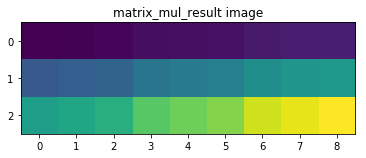

In [60]:
matrix_mul_result, flatten_filter = matrix_multiplication(toeplitz_structure_matrix, filter)
print ("toeplitz_structure_matrix.shape =", toeplitz_structure_matrix.shape)
print ("flatten_filter.shape =", flatten_filter.shape)
print ("matrix_mul_result.shape =", matrix_mul_result.shape)
print(matrix_mul_result)
print("result at address 13 is:",matrix_mul_result[1][4])
fig = matrix_mul_result[:,:]
plt.imshow(fig)
plt.title('matrix_mul_result image')

In [61]:
def post_processing(X):
    """
    Function: post processing
                Down sampling
                Output feature maps
    """
    n_ch, n_r, n_c = X.shape
    Z = np.zeros((n_ch, int(n_r / 2) , int(n_c / 2) ))
    for i in range(0, n_ch): 
        for j in range(0, n_r, 2):
            for k in range(0, n_r, 2):
                if (j+k) % 2 == 0:  
                    Z[i][int(j/2)][int(k/2)] = X[i][j][k]
    return Z

In [62]:
down_sampled_matrix = post_processing(input_up_sampling)
print ("down_sampled_matrix.shape", down_sampled_matrix.shape)
print(down_sampled_matrix)

down_sampled_matrix.shape (2, 5, 5)
[[[  0.   1.   2.   3.   4.]
  [  5.   6.   7.   8.   9.]
  [ 10.  11.  12.  13.  14.]
  [ 15.  16.  17.  18.  19.]
  [ 20.  21.  22.  23.  24.]]

 [[ 25.  26.  27.  28.  29.]
  [ 30.  31.  32.  33.  34.]
  [ 35.  36.  37.  38.  39.]
  [ 40.  41.  42.  43.  44.]
  [ 45.  46.  47.  48.  49.]]]
